# Iris Dataset Features 🌸

![Iris Flower - Sepal & Petal](iris-machinelearning.png)

## Feature Explanation:
- **SepalLengthCm** → Length of the sepal in centimeters.  
- **SepalWidthCm** → Width of the sepal in centimeters.  
- **PetalLengthCm** → Length of the petal in centimeters.  
- **PetalWidthCm** → Width of the petal in centimeters.  


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Splitting Data
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

import joblib

In [3]:
File_Path = os.path.join(os.getcwd(), 'Iris.csv')
df = pd.read_csv(File_Path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [5]:
df.shape

(150, 6)

#### EDA (Exploratory Data Analysis)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [10]:
df.isnull().sum()

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop('id', axis = 1, inplace = True)

In [13]:
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [14]:
df.dtypes

sepallengthcm    float64
sepalwidthcm     float64
petallengthcm    float64
petalwidthcm     float64
species           object
dtype: object

In [15]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df[df['species'] == 'Iris-setosa'].value_counts().index.tolist()

[(4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (4.3, 3.0, 1.1, 0.1, 'Iris-setosa'),
 (5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (5.1, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (5.1, 3.8, 1.6, 0.2, 'Iris-setosa'),
 (5.1, 3.8, 1.9, 0.4, 'Iris-setosa'),
 (5.2, 3.4, 1.4, 0.2, 'Iris-setosa'),
 (5.2, 3.5, 1.5, 0.2, 'Iris-setosa'),
 (5.2, 4.1, 1.5, 0.1, 'Iris-setosa'),
 (5.3, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (5.4, 3.4, 1.5, 0.4, 'Iris-setosa'),
 (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (5.5, 3.5, 1.3, 0.2, 'Iris-setosa'),
 (5.5, 4.2, 1.4, 0.2, 'Iris-setosa'),
 (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 (5.0, 3.5, 1.6, 0.6, 'Iris-setosa'),
 (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (4.8, 3.0, 

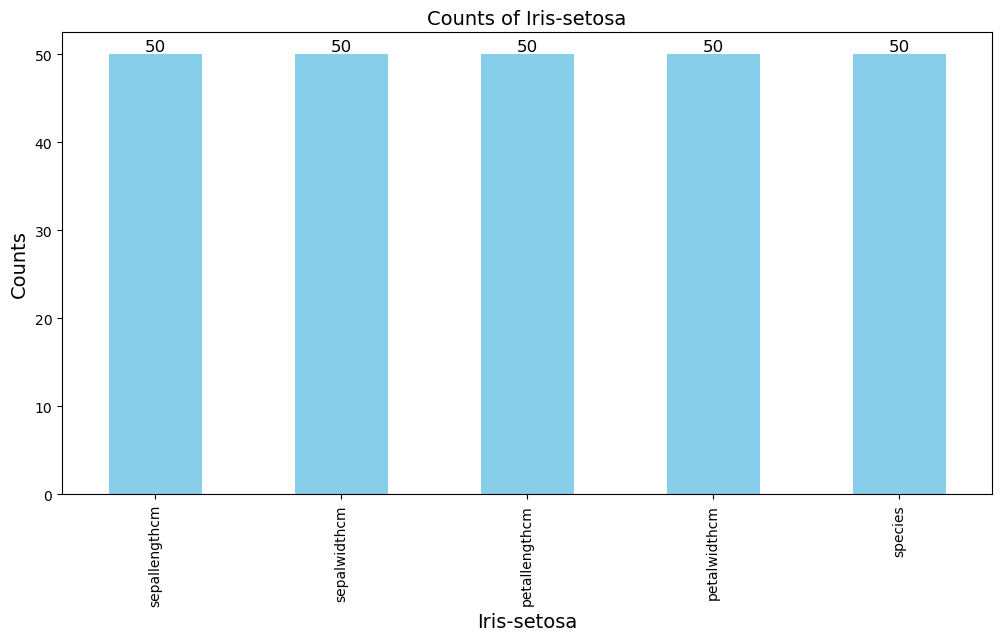

In [17]:
ax = df[df['species'] == 'Iris-setosa'].count().plot(kind='bar', figsize = (12, 6), color='skyblue')

for i in ax.patches:
    ax.annotate(str(int(i.get_height())), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='bottom', color='k', fontsize=12)

plt.title('Counts of Iris-setosa', fontsize = 14)
plt.xlabel('Iris-setosa', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

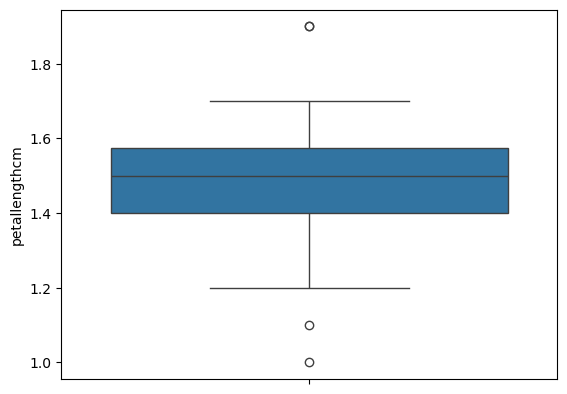

In [18]:
sns.boxplot(data=df[df['species'] == 'Iris-setosa'], y='petallengthcm')
plt.show()

In [19]:
df[df['species'] == 'Iris-versicolor'].value_counts().index.tolist()

[(4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'),
 (6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (6.0, 2.7, 5.1, 1.6, 'Iris-versicolor'),
 (6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'),
 (6.0, 3.4, 4.5, 1.6, 'Iris-versicolor'),
 (6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'),
 (6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'),
 (6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'),
 (6.1, 3.0, 4.6, 1.4, 'Iris-versicolor'),
 (6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'),
 (6.2, 2.9, 4.3, 1.3, 'Iris-versicolor'),
 (6.3, 2.3, 4.4, 1.3, 'Iris-versicolor'),
 (6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'),
 (5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'),
 (6.4, 2.9, 4.3, 1.3, 'Iris-versicolor'),
 (6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'),
 (6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'),
 (6.6, 2.9, 4.6, 1.3, 'Iris-versicolor'),
 (6.6, 3.0, 4.4, 1.4, 'Iris-versicolor'),
 (6.7, 3.0, 5.0, 1.7, 'Iris-versicolor'),
 (6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'),
 (6.7, 3.1, 4.7, 1.5, 'Iris-versicolor'),
 (6.8, 2.8, 4.8, 1.4, 'Iris-versicolor'),
 (6.9, 3.1, 4.9, 1.5, 'Iris-versic

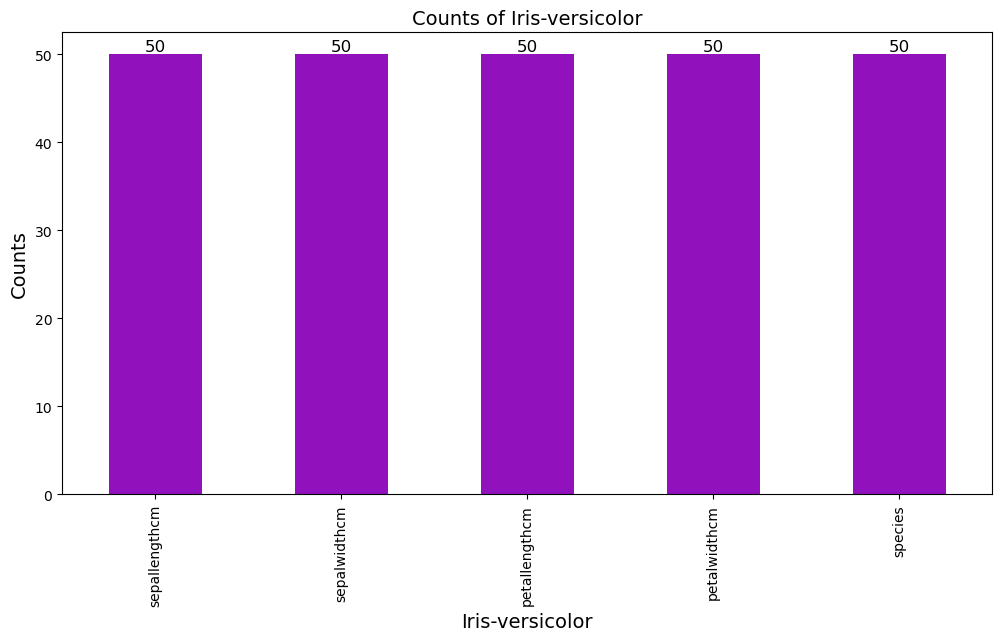

In [20]:
ax1 = df[df['species'] == 'Iris-versicolor'].count().plot(kind = 'bar', figsize = (12, 6), color = '#9112BC')

for j in ax1.patches:
    ax1.annotate(str(int(j.get_height())),
               (j.get_x() + j.get_width() /2., j.get_height()),
               ha = 'center', color = 'k', va='bottom', fontsize = 12)

plt.title('Counts of Iris-versicolor', fontsize = 14)
plt.xlabel('Iris-versicolor', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

In [21]:
df[df['species'] == 'Iris-virginica'].value_counts().index.tolist()

[(5.8, 2.7, 5.1, 1.9, 'Iris-virginica'),
 (4.9, 2.5, 4.5, 1.7, 'Iris-virginica'),
 (7.1, 3.0, 5.9, 2.1, 'Iris-virginica'),
 (6.7, 2.5, 5.8, 1.8, 'Iris-virginica'),
 (6.7, 3.0, 5.2, 2.3, 'Iris-virginica'),
 (6.7, 3.1, 5.6, 2.4, 'Iris-virginica'),
 (6.7, 3.3, 5.7, 2.1, 'Iris-virginica'),
 (6.7, 3.3, 5.7, 2.5, 'Iris-virginica'),
 (6.8, 3.0, 5.5, 2.1, 'Iris-virginica'),
 (6.8, 3.2, 5.9, 2.3, 'Iris-virginica'),
 (6.9, 3.1, 5.1, 2.3, 'Iris-virginica'),
 (6.9, 3.1, 5.4, 2.1, 'Iris-virginica'),
 (6.9, 3.2, 5.7, 2.3, 'Iris-virginica'),
 (7.2, 3.0, 5.8, 1.6, 'Iris-virginica'),
 (6.5, 3.0, 5.8, 2.2, 'Iris-virginica'),
 (7.2, 3.2, 6.0, 1.8, 'Iris-virginica'),
 (7.2, 3.6, 6.1, 2.5, 'Iris-virginica'),
 (7.3, 2.9, 6.3, 1.8, 'Iris-virginica'),
 (7.4, 2.8, 6.1, 1.9, 'Iris-virginica'),
 (7.6, 3.0, 6.6, 2.1, 'Iris-virginica'),
 (7.7, 2.6, 6.9, 2.3, 'Iris-virginica'),
 (7.7, 2.8, 6.7, 2.0, 'Iris-virginica'),
 (7.7, 3.0, 6.1, 2.3, 'Iris-virginica'),
 (7.7, 3.8, 6.7, 2.2, 'Iris-virginica'),
 (6.5, 3.2, 5.1,

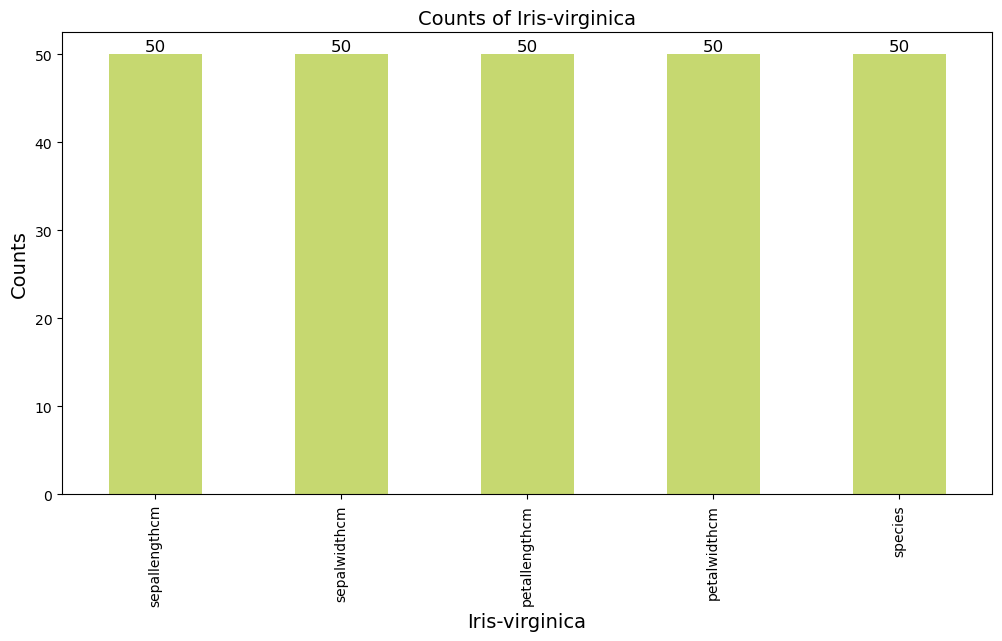

In [22]:
ax2 = df[df['species'] == 'Iris-virginica'].count().plot(kind = 'bar', figsize = (12, 6), color = '#C6D870')

for k in ax2.patches:
    ax2.annotate(str(int(k.get_height())),
               (k.get_x() + k.get_width() /2., k.get_height()),
               ha = 'center', color = 'k', va='bottom', fontsize = 12)

plt.title('Counts of Iris-virginica', fontsize = 14)
plt.xlabel('Iris-virginica', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

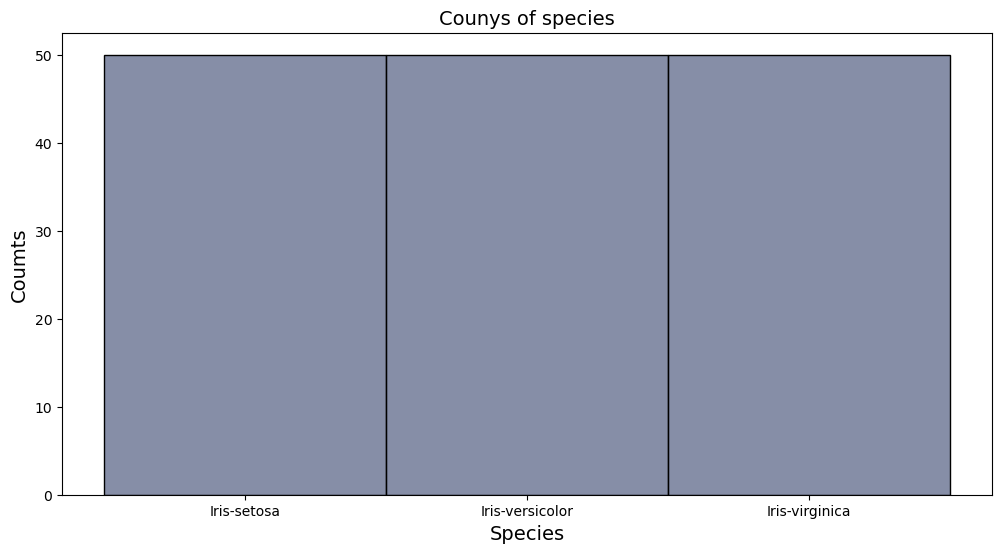

In [23]:
plt.figure(figsize = (12, 6))
sns.histplot(data = df, x = 'species', color = '#5D688A')

plt.title('Counys of species', fontsize = 14)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Coumts', fontsize = 14)

plt.show()

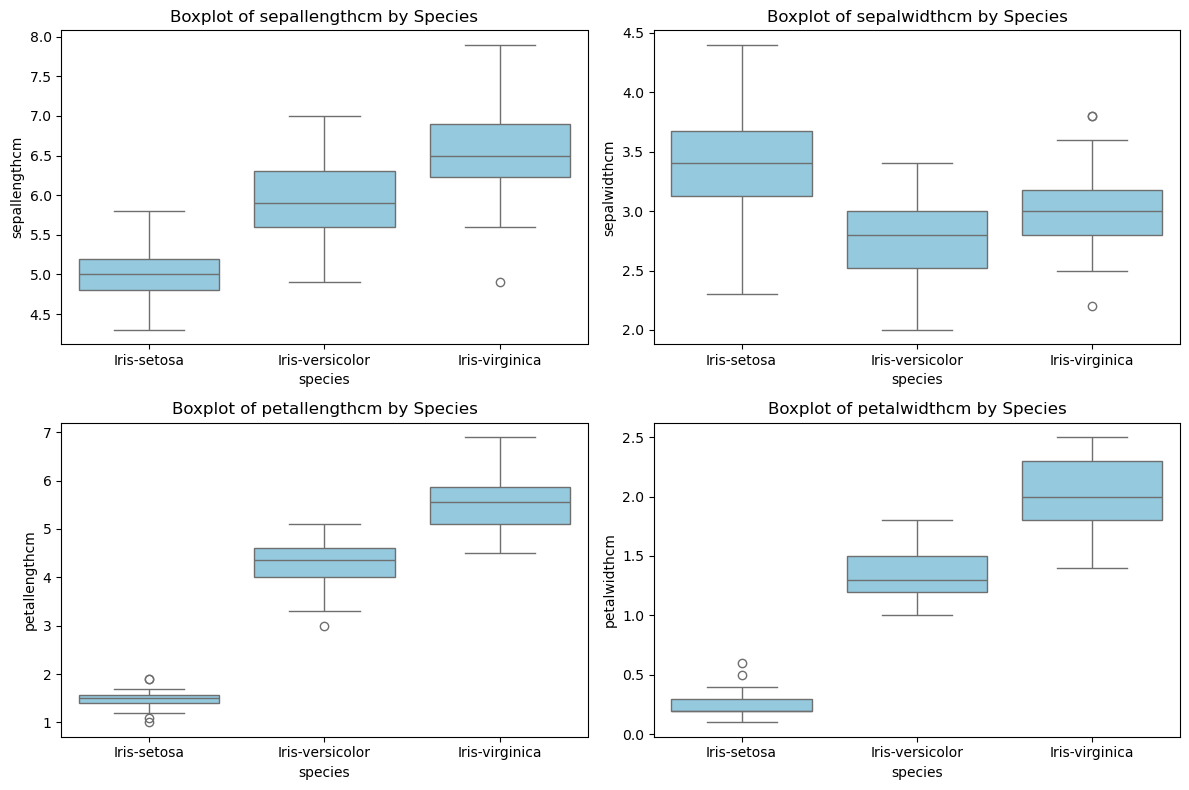

In [24]:
num_cols = df.columns.drop('species')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data=df, x='species', y=col, ax=ax, color = 'skyblue')
    ax.set_title(f'Boxplot of {col} by Species')

plt.tight_layout()
plt.show()

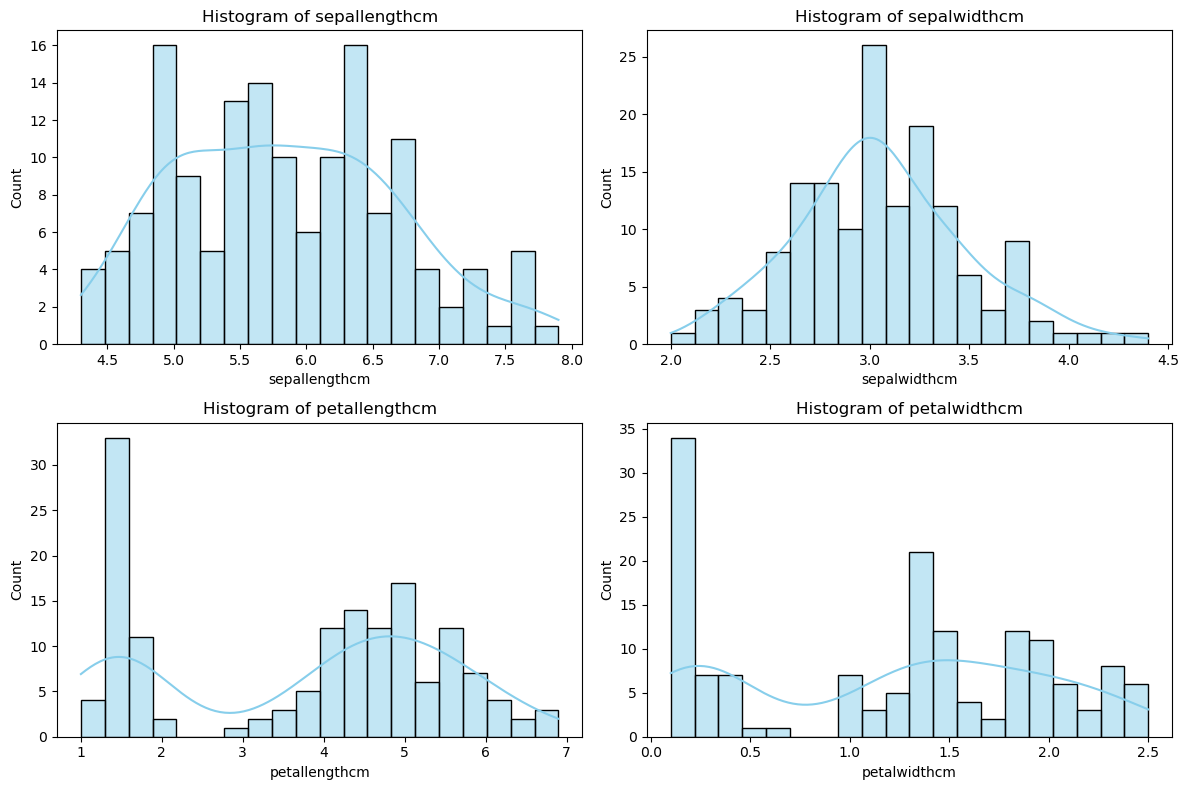

In [25]:
num_cols = df.columns.drop('species')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df, x=col, bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

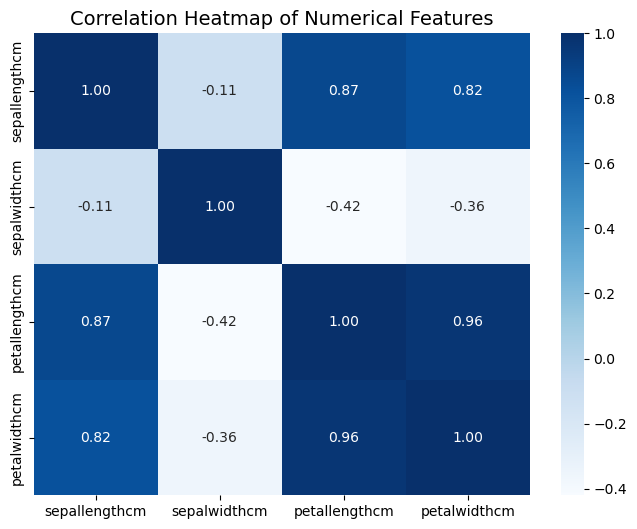

In [26]:
num_col = df.select_dtypes(include = 'number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(num_col, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

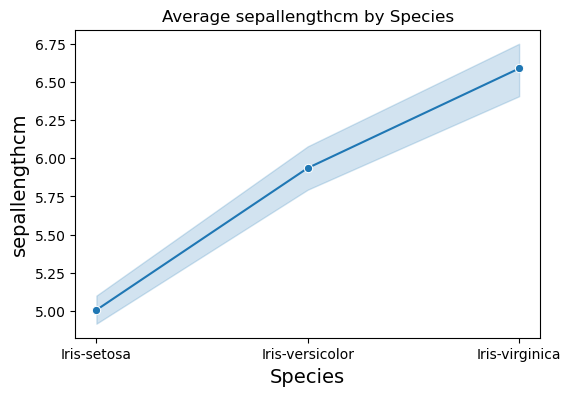

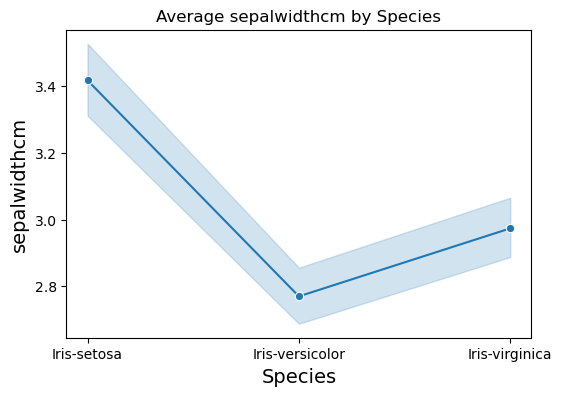

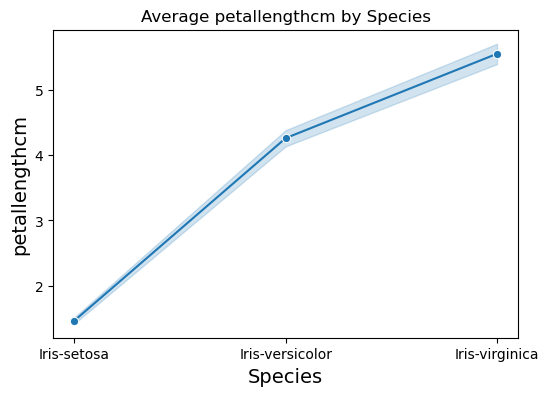

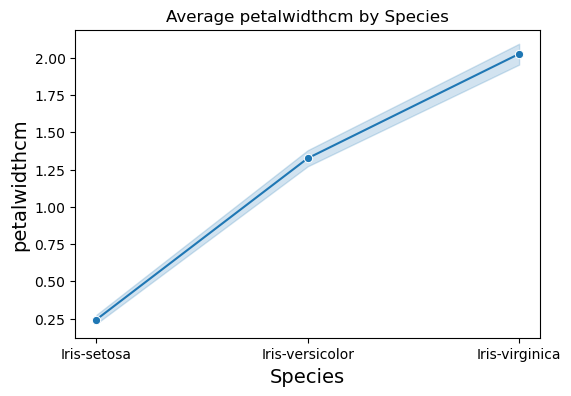

In [27]:
for col in df.columns.drop('species'):
    plt.figure(figsize=(6,4))
    sns.lineplot(data=df, x='species', y=col, estimator='mean', marker="o")
    plt.title(f'Average {col} by Species')
    plt.xlabel("Species", fontsize = 14)
    plt.ylabel(col, fontsize = 14)
    plt.show()

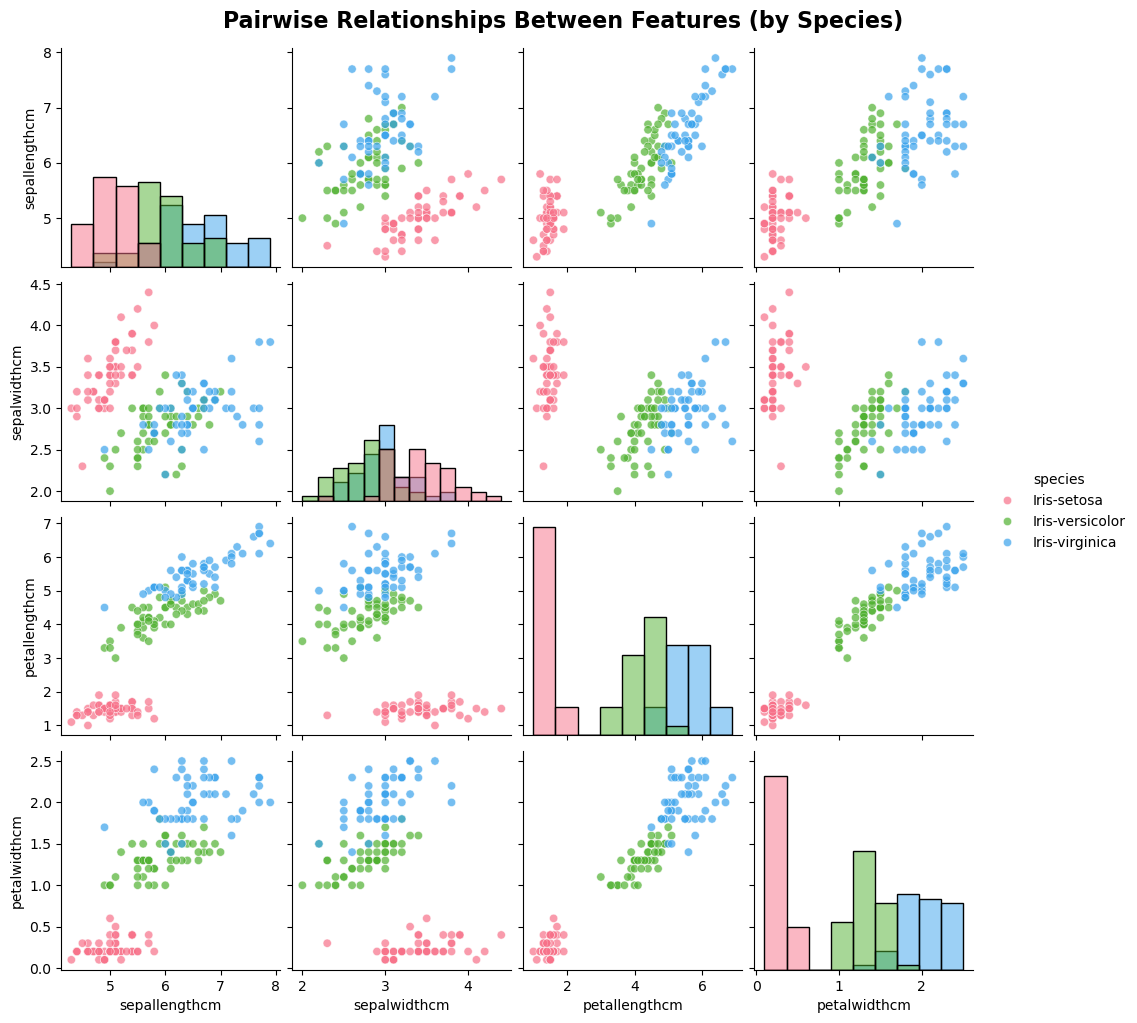

In [28]:
pair_plot = sns.pairplot(
    df, 
    hue='species',
    palette='husl',
    diag_kind='hist',
    plot_kws={'alpha': 0.7}
)

pair_plot.fig.suptitle(
    'Pairwise Relationships Between Features (by Species)',
    fontsize=16, fontweight='bold', y=1.02
)
plt.show()

## feature Engineering

In [30]:
# 2. Encode Target

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [31]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### Splitting Data

In [33]:
X = df.drop(columns = ['species'])
y = df['species']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [35]:
print(f'shape of X_train --> {X_train.shape}')
print(f'shape of X_test --> {X_test.shape}')
print(f'shape of y_train --> {y_train.shape}')
print(f'shape of y_test --> {y_test.shape}')

shape of X_train --> (120, 4)
shape of X_test --> (30, 4)
shape of y_train --> (120,)
shape of y_test --> (30,)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

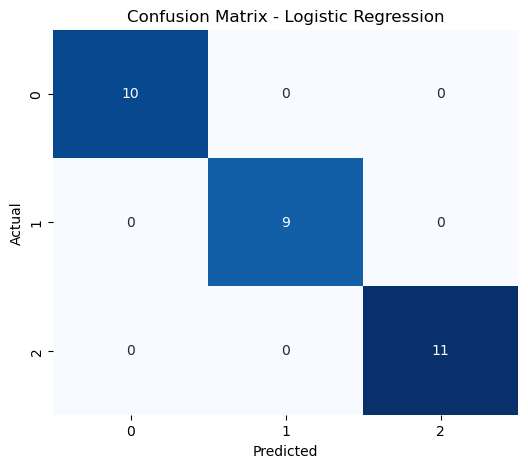

In [55]:
## confusion_matrix in Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(6,5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [63]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_log_reg
})

print(comparison.head(20))

     Actual  Predicted
73        1          1
18        0          0
118       2          2
78        1          1
76        1          1
31        0          0
64        1          1
141       2          2
68        1          1
82        1          1
110       2          2
12        0          0
36        0          0
9         0          0
19        0          0
56        1          1
104       2          2
69        1          1
55        1          1
132       2          2


In [59]:
## Accurecy on test data
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_percent = accuracy_log_reg * 100

print(f"Accuracy log_reg: {accuracy_percent:.2f}%")

Accuracy log_reg: 100.00%


In [67]:
# accuracy on training data
y_train_pred_log_reg = log_reg.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred_log_reg) * 100

print(f"Train Accuracy log_reg: {accuracy_train:.2f}%")

Train Accuracy log_reg: 96.67%


In [69]:
## Precision
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='micro')
precision_percent = precision_log_reg * 100

print(f"Precision log_reg: {precision_percent:.2f}%")

Precision log_reg: 100.00%


In [71]:
## Recall
recall_precision_log_reg = recall_score(y_test, y_pred_log_reg, average='micro')
recall_percent = recall_precision_log_reg * 100

print(f"Recall log_reg: {recall_percent:.2f}%")

Recall log_reg: 100.00%


In [77]:
## f1 Score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
f1_percent = f1_log_reg * 100

print(f"F1 log_reg: {f1_percent:.2f}%")

F1 log_reg: 100.00%


## Nearest Neighbors

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

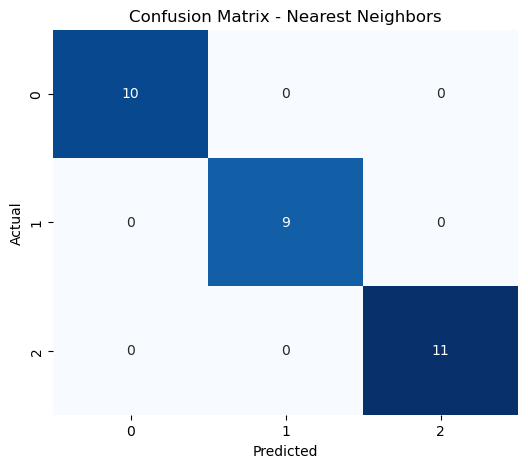

In [88]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Nearest Neighbors')
plt.show()

In [90]:
## Accurecy on test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_percent_knn = accuracy_knn * 100

print(f"Accuracy knn: {accuracy_percent_knn:.2f}%")

Accuracy knn: 100.00%


In [92]:
# Accuracy on train data
y_train_pred_knn = knn.predict(X_train_scaled)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn) * 100
print(f"Train Accuracy knn: {accuracy_train_knn:.2f}%")

Train Accuracy knn: 95.83%


In [94]:
## Precision
precision_knn = precision_score(y_test, y_pred_knn, average='micro')
precision_percent_knn = precision_knn * 100

print(f"Precision knn: {precision_percent_knn:.2f}%")

Precision knn: 100.00%


In [96]:
## Recall
recall_precision__knn = recall_score(y_test, y_pred_knn, average='micro')
recall_percent_knn = recall_precision__knn * 100

print(f"Recall knn: {recall_percent_knn:.2f}%")

Recall knn: 100.00%


In [98]:
## f1 Score
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_percent_knn = f1_knn * 100

print(f"F1 knn: {f1_percent_knn:.2f}%")

F1 knn: 100.00%


## Decision Tree

In [103]:
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

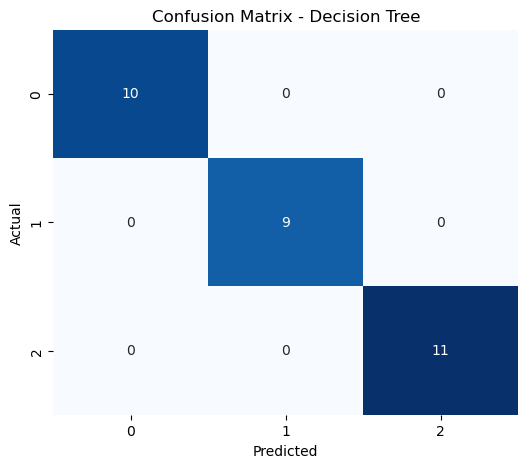

In [107]:
cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)

plt.figure(figsize=(6,5))
sns.heatmap(cm_dec_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [105]:
## Accurecy on test data
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_percent_dec_tree = accuracy_dec_tree * 100

print(f"Accuracy dec_tree: {accuracy_percent_dec_tree:.2f}%")

Accuracy dec_tree: 100.00%


In [109]:
# Accuracy on train data
y_train_pred_dec_tree = dec_tree.predict(X_train)
accuracy_train_dec_tree = accuracy_score(y_train, y_train_pred_dec_tree) * 100
print(f"Train Accuracy dec_tree: {accuracy_train_dec_tree:.2f}%")

Train Accuracy dec_tree: 99.17%


In [111]:
## Precision
precision_dec_tree = precision_score(y_test, y_pred_dec_tree, average='micro')
precision_percent_dec_tree = precision_dec_tree * 100

print(f"Precision dec_tree: {precision_percent_dec_tree:.2f}%")

Precision dec_tree: 100.00%


In [113]:
## Recall
recall_precision__dec_tree = recall_score(y_test, y_pred_dec_tree, average='micro')
recall_percent_dec_tree = recall_precision__dec_tree * 100

print(f"Recall dec_tree: {recall_percent_dec_tree:.2f}%")

Recall dec_tree: 100.00%


In [115]:
## f1 Score
f1_dec_tree = f1_score(y_test, y_pred_dec_tree, average='macro')
f1_percent_dec_tree = f1_dec_tree * 100

print(f"F1 dec_tree: {f1_percent_dec_tree:.2f}%")

F1 dec_tree: 100.00%


### Random Forest

In [ ]:
rand_forest = RandomForestClassifier(
    n_estimators=100,    
    criterion='gini',    
    max_depth=None,    
    random_state=42
)

rand_forest.fit(X_train, y_train)
 
y_pred_rand_forest = rand_forest.predict(X_test)

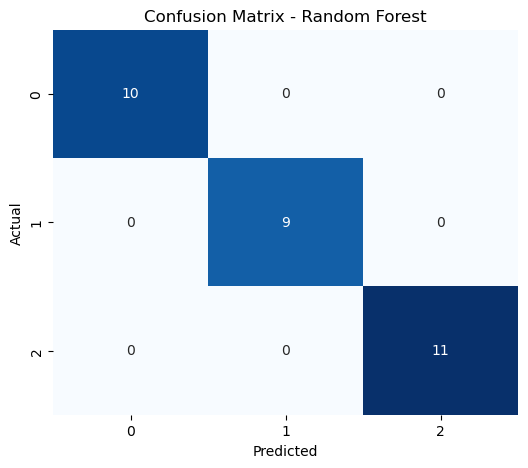

In [122]:
cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rand_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [124]:
## Accurecy on test data
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
accuracy_percent_rand_forest = accuracy_rand_forest * 100

print(f"Accuracy rand_forest: {accuracy_percent_rand_forest:.2f}%")

Accuracy rand_forest: 100.00%


In [126]:
# Accuracy on train data
y_train_pred_rand_forest = rand_forest.predict(X_train)
accuracy_train_rand_forest = accuracy_score(y_train, y_train_pred_rand_forest) * 100
print(f"Train Accuracy rand_forest: {accuracy_train_rand_forest:.2f}%")

Train Accuracy rand_forest: 100.00%


In [128]:
## Precision
precision_accuracy_rand_forest = precision_score(y_test, y_pred_rand_forest, average='micro')
precision_percent_rand_forest = precision_accuracy_rand_forest * 100

print(f"Precision rand_forest: {precision_percent_rand_forest:.2f}%")

Precision rand_forest: 100.00%


In [130]:
## Recall
recall_precision__dec_tree = recall_score(y_test, y_pred_dec_tree, average='micro')
recall_percent_dec_tree = recall_precision__dec_tree * 100

print(f"Recall rand_forest: {recall_percent_dec_tree:.2f}%")

Recall rand_forest: 100.00%


In [132]:
## f1 Score
f1_rand_forest = f1_score(y_test, y_pred_rand_forest, average='macro')
f1_percent_rand_forest = f1_rand_forest* 100

print(f"F1 rand_forest: {f1_percent_rand_forest:.2f}%")

F1 rand_forest: 100.00%


In [134]:
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest,
}

In [136]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

In [144]:
for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred) * 100)
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted") * 100)
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted") * 100)
    metrics["F1"].append(f1_score(y_test, y_pred, average="weighted") * 100)

In [146]:
df_metrics = pd.DataFrame(metrics)

In [148]:
df_metrics

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,100.0,100.0,100.0,100.0
1,KNN,100.0,100.0,100.0,100.0
2,Decision Tree,100.0,100.0,100.0,100.0
3,Random Forest,100.0,100.0,100.0,100.0
4,Logistic Regression,100.0,100.0,100.0,100.0
5,KNN,100.0,100.0,100.0,100.0
6,Decision Tree,100.0,100.0,100.0,100.0
7,Random Forest,100.0,100.0,100.0,100.0


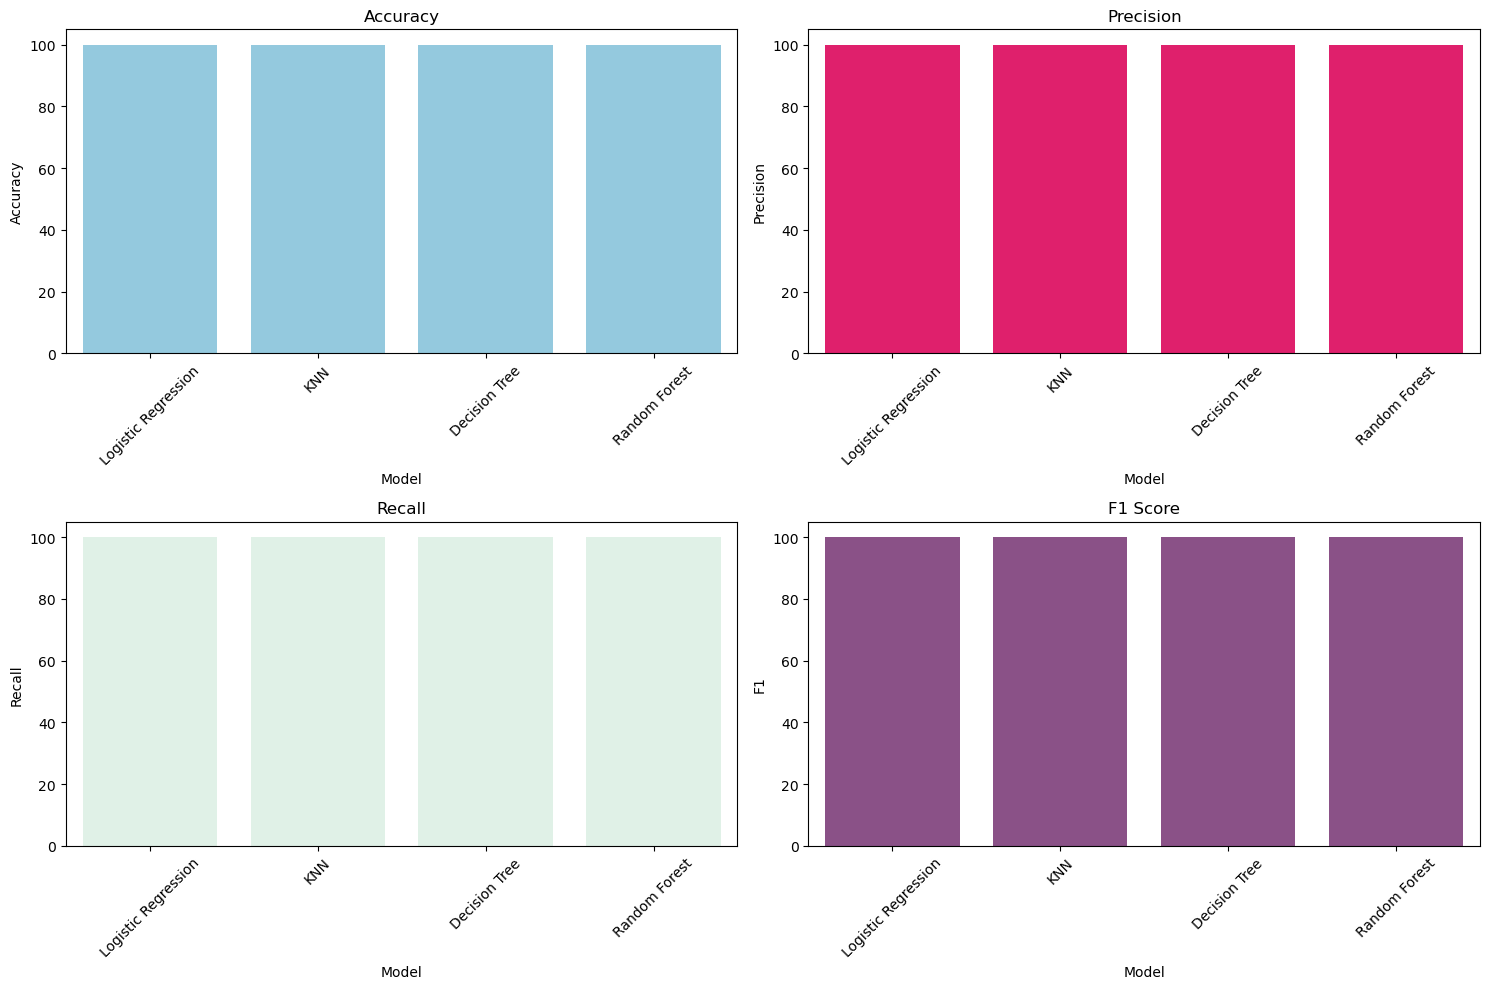

In [156]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.barplot(x='Model', y='Accuracy', data=df_metrics, ax=ax[0,0], color='skyblue')
ax[0,0].set_title('Accuracy')
ax[0,0].tick_params(axis='x', rotation=45)
sns.barplot(x='Model', y='Precision', data=df_metrics, ax=ax[0,1], color='#FF0066')
ax[0,1].set_title('Precision')
ax[0,1].tick_params(axis='x', rotation=45)
sns.barplot(x='Model', y='Recall', data=df_metrics, ax=ax[1,0], color='#DDF4E7')
ax[1,0].set_title('Recall')
ax[1,0].tick_params(axis='x', rotation=45)
sns.barplot(x='Model', y='F1', data=df_metrics, ax=ax[1,1], color='#934790')
ax[1,1].set_title('F1 Score')
ax[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

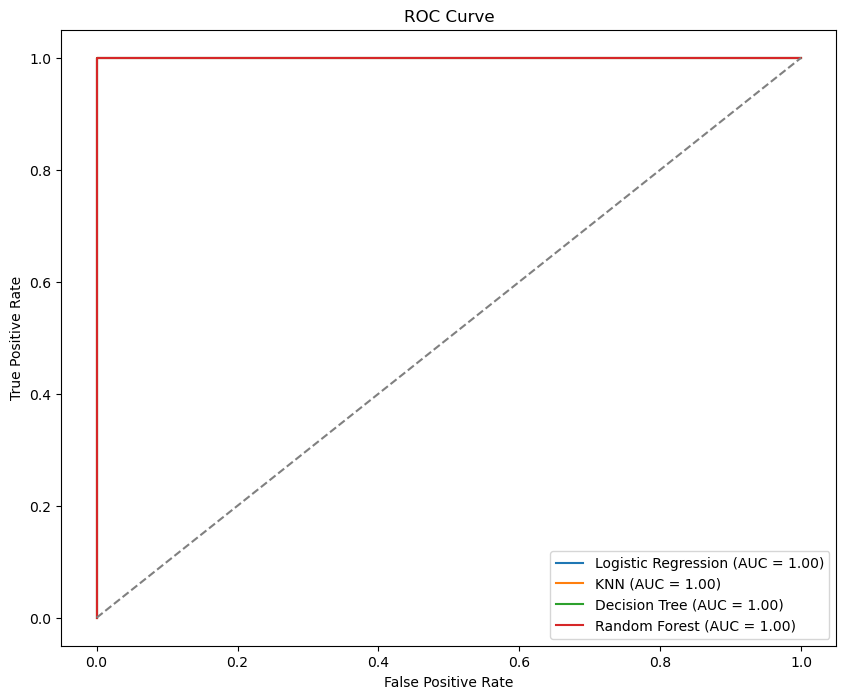

In [162]:
plt.figure(figsize=(10,8))
for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        X_te = X_test_scaled
    else:
        X_te = X_test
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_te)
        auc_score = roc_auc_score(y_test, y_scores, multi_class="ovr", average="macro")
    else:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [166]:
joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(dec_tree, "decision_tree_model.pkl")
joblib.dump(rand_forest, "random_forest_model.pkl")

['random_forest_model.pkl']